In [2]:
import pandas as pd
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.datasets import fetch_stackexchange
from lightfm.evaluation import auc_score

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

/Users/davidwang/opt/anaconda3/lib/python3.8/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [3]:
stackexch = fetch_stackexchange('crossvalidated')

stackexch_train, stackexch_test = stackexch['train'], stackexch['test']


In [13]:
alpha = 1e-05
epochs = 30
num_components = 30

stack_model = LightFM(no_components=num_components,
                    loss='warp',
                    learning_schedule='adagrad',
                    max_sampled=100,
                    user_alpha=alpha,
                    item_alpha=alpha,
                    learning_rate = 0.01)



In [14]:
stack_auc = []

for epoch in range(epochs):
    stack_model.fit_partial(stackexch_train, epochs = 1)
    stack_auc.append(auc_score(stack_model, stackexch_test, train_interactions = stackexch_train).mean())
                               
                               

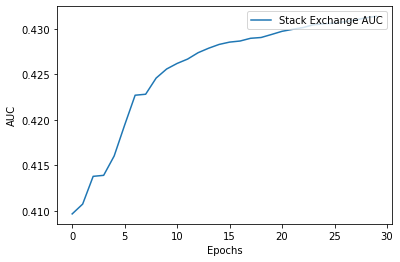

In [19]:
#graph

x = np.arange(epochs)

plt.plot(x, np.array(stack_auc))
plt.xlabel('Epochs')
plt.ylabel('AUC')

plt.legend(['Stack Exchange AUC'], loc = 'upper right')

plt.savefig('Hybrid_Model_Stack.png', facecolor = 'w')